# Predicting Credit Defaulters using Deep Learning

## Step 1. Problem Definition
> The goal of this project is to develop a predictive model that can accurately classify borrowers as defaulters or non-defaulters based on various financial and demographic factors.

## Step 2. Loading the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import loguniform
import scipy.stats as stat 
import pylab
%matplotlib inline

## Step 3. Load & prepare the data

I have done the EDA and all the feature engineering on the machine learning part. I willjust load the cleaned data and do the other preprocessing

In [2]:
# Load it into the df dataframe
df = pd.read_csv('data/clean_loan_cyclic.csv')
df.head(3)

,loan_type,interest_rate,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status,total_amount,...,due_date_month_sin,due_date_month_cos,application_date_day_sin,application_date_day_cos,approval_date_day_sin,approval_date_day_cos,disbursement_date_day_sin,disbursement_date_day_cos,due_date_day_sin,due_date_day_cos
0,Car Loan,0.051852,Self-employed,Medium,833,Male,Single,Master,0,17665.849453,...,-0.866025,-0.5,8.660254e-01,0.5,-0.994522,0.104528,-0.951057,0.309017,0.207912,-0.978148
1,Personal Loan,0.089296,Full-time,Medium,776,Female,Married,Bachelor,0,2026.089950,...,0.866025,-0.5,-1.133108e-15,1.0,0.207912,0.978148,0.587785,-0.809017,0.866025,0.500000
2,Personal Loan,0.070470,Full-time,Low,697,Male,Divorced,High School,0,83303.941470,...,0.866025,0.5,5.665539e-16,-1.0,-0.587785,-0.809017,-0.587785,0.809017,-0.951057,0.309017


## Step 4. Data Preprocessing

Now we need to perform necessary procedures to preprocess our data such as:
1. Creating X & y
2. Encoding Categorical Features
3. Splitting data
4. Feature Scaling
5. Etc.

### Create X & y

In [3]:
X = df.drop(['default_status'], axis=1)
y = df['default_status']

### Encode Categorical Features (same process as the version one)

Encode gender first and use drop first since it's only binary

In [4]:
# Use pandas get dummies
X = pd.get_dummies(X, 
                   columns=['gender'],
                   dtype=int,
                   drop_first=True)
X.head(3)

,loan_type,interest_rate,employment_type,income_level,credit_score,marital_status,education_level,total_amount,monthly_payment,application_date_year,...,due_date_month_cos,application_date_day_sin,application_date_day_cos,approval_date_day_sin,approval_date_day_cos,disbursement_date_day_sin,disbursement_date_day_cos,due_date_day_sin,due_date_day_cos,gender_Male
0,Car Loan,0.051852,Self-employed,Medium,833,Single,Master,17665.849453,1177.723297,2018,...,-0.5,8.660254e-01,0.5,-0.994522,0.104528,-0.951057,0.309017,0.207912,-0.978148,1
1,Personal Loan,0.089296,Full-time,Medium,776,Married,Bachelor,2026.089950,36.180178,2022,...,-0.5,-1.133108e-15,1.0,0.207912,0.978148,0.587785,-0.809017,0.866025,0.500000,0
2,Personal Loan,0.070470,Full-time,Low,697,Divorced,High School,83303.941470,1633.410617,2019,...,0.5,5.665539e-16,-1.0,-0.587785,-0.809017,-0.587785,0.809017,-0.951057,0.309017,1


Encode the rest of category

In [5]:
# Using list comprehension to get all the reamining object type from columns
obj_col = [col for col in X.columns if X[col].dtype == 'O']

# Using the object columns we pass it to pandas get dummies to get the one hot encode of the columns
X = pd.get_dummies(X,
                   columns=obj_col,
                   dtype=int)
X.head(3)

,interest_rate,credit_score,total_amount,monthly_payment,application_date_year,approval_date_year,disbursement_date_year,due_date_year,application_date_month_sin,application_date_month_cos,...,income_level_High,income_level_Low,income_level_Medium,marital_status_Divorced,marital_status_Married,marital_status_Single,education_level_Bachelor,education_level_High School,education_level_Master,education_level_PhD
0,0.051852,833,17665.849453,1177.723297,2018,2018,2018,2018,8.660254e-01,-0.500000,...,0,0,1,0,0,1,0,0,1,0
1,0.089296,776,2026.089950,36.180178,2022,2022,2023,2023,-2.449294e-16,1.000000,...,0,0,1,0,1,0,1,0,0,0
2,0.070470,697,83303.941470,1633.410617,2019,2019,2019,2020,-5.000000e-01,0.866025,...,0,1,0,1,0,0,0,1,0,0


### Split into train, validation and test set

In [6]:
# Import the library
from sklearn.model_selection import train_test_split

# Split first into train and temporary set called temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now split temp into validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Scale all numeric using StandardScaler

In [7]:
# Get all the columns that has continous value and put it onto a list
feat_col = ['interest_rate', 'credit_score', 'total_amount', 'monthly_payment',
            'application_date_year', 'approval_date_year', 'disbursement_date_year', 'due_date_year']

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
sc = StandardScaler()

# Feature scale the train and test set
X_train[feat_col] = sc.fit_transform(X_train[feat_col])
X_test[feat_col] = sc.transform(X_test[feat_col])
X_val[feat_col] = sc.transform(X_val[feat_col])

## Step 5. Predicition using Artificial Neural Network

Make a function that will score the model

In [8]:
# Import library for accuracy score
from sklearn.metrics import accuracy_score

# Create a fucntion that will take 3 inputs, y_true value, y_predicted, and the dictionary name
def evaluate_model(y_true, y_predictions, model_name, score_dictionary):
    model_score = accuracy_score(y_true, y_predictions)
    score_dictionary[model_name] = model_score * 100
 
    return score_dictionary

In [9]:
# Create a dictionary for the baseline models
baseline_scores = {}

### Perform SMOTE

This is different from the version one where we get the scores from the original train set then perform SMOTE. 

We will directly perform SMOTE.

In [10]:
# Import SMOTE from imblean
from imblearn.over_sampling import SMOTE

# Instantite SMOTE
smote = SMOTE()

# Resample train set
X_smote, y_smote = smote.fit_resample(X_train, y_train)

### Create Neural Network Architecture

In [11]:
# Impoer libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU, Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import Recall
from sklearn.metrics import accuracy_score

Create a function that will make the model stop when it reach validation recall of 0.80

In [12]:
# Define a custom callback
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check the recall value for the validation dataset
        val_recall = logs.get('val_recall')  # Make sure you log 'val_recall' during training
        
        # Define the desired recall threshold
        desired_recall = 0.80
        
        # Check if the desired recall threshold is reached
        if val_recall is not None and val_recall >= desired_recall:
            print(f"\nDesired recall ({desired_recall}) reached. Stopping training.")
            self.model.stop_training = True

# Instantiate the class function
custom_callback = CustomCallback()

In [42]:
# Need to clear session before retrain model
tf.keras.backend.clear_session()

Create layes for neural network, leakyrelu, dropout, and batch normalization were used to the model.

In [43]:
# Create the main brain of the neural network
model = Sequential()

# Add the first layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# Add the hidden layers
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(64))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Add the output layer with sigmoid activation for classification
model.add(Dense(1, activation='sigmoid'))

In [44]:
# Compile the model, we will monitor its accuracy and recall
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy', Recall()])

In [45]:
# Train the model using our custom callback with validation set as the validation data
model.fit(x=X_smote, y=y_smote, batch_size=32, epochs=500, validation_data=(X_val,y_val),callbacks=[custom_callback])


Epoch 1/500
176/176 [==============================] - 5s 9ms/step - loss: 0.8650 - accuracy: 0.5071 - recall: 0.4986 - val_loss: 0.6914 - val_accuracy: 0.5360 - val_recall: 0.5511
Epoch 2/500
176/176 [==============================] - 1s 7ms/step - loss: 0.8084 - accuracy: 0.5082 - recall: 0.5093 - val_loss: 0.6864 - val_accuracy: 0.5973 - val_recall: 0.4432
Epoch 3/500
176/176 [==============================] - 1s 8ms/step - loss: 0.7801 - accuracy: 0.5194 - recall: 0.5093 - val_loss: 0.6803 - val_accuracy: 0.6267 - val_recall: 0.4432
Epoch 4/500
176/176 [==============================] - 1s 8ms/step - loss: 0.7579 - accuracy: 0.5166 - recall: 0.5100 - val_loss: 0.6912 - val_accuracy: 0.5933 - val_recall: 0.4886
Epoch 5/500
176/176 [==============================] - 1s 7ms/step - loss: 0.7317 - accuracy: 0.5257 - recall: 0.5218 - val_loss: 0.6897 - val_accuracy: 0.5880 - val_recall: 0.4545
Epoch 6/500
176/176 [==============================] - 2s 9ms/step - loss: 0.7373 - accuracy: 0

### Plot the validation recall and validation accuracy

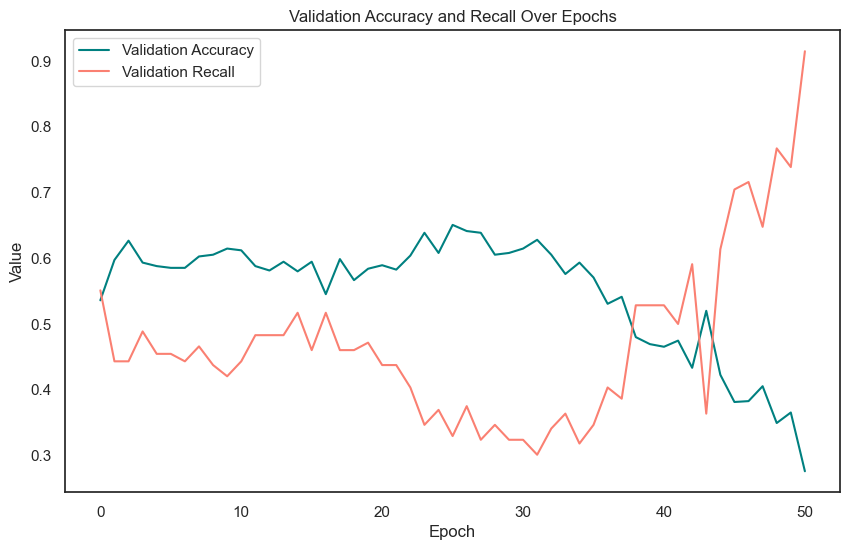

In [49]:
# Get the data of accuracy and recall from histoty.history
val_accuracy = model.history.history['val_accuracy']
val_recall = model.history.history['val_recall']

# Create a plot
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(val_accuracy, label='Validation Accuracy', color='teal')

# Plot validation recall
plt.plot(val_recall, label='Validation Recall', color='salmon')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Validation Accuracy and Recall Over Epochs')
plt.legend()
# plt.grid()

# Show the plot
plt.show()

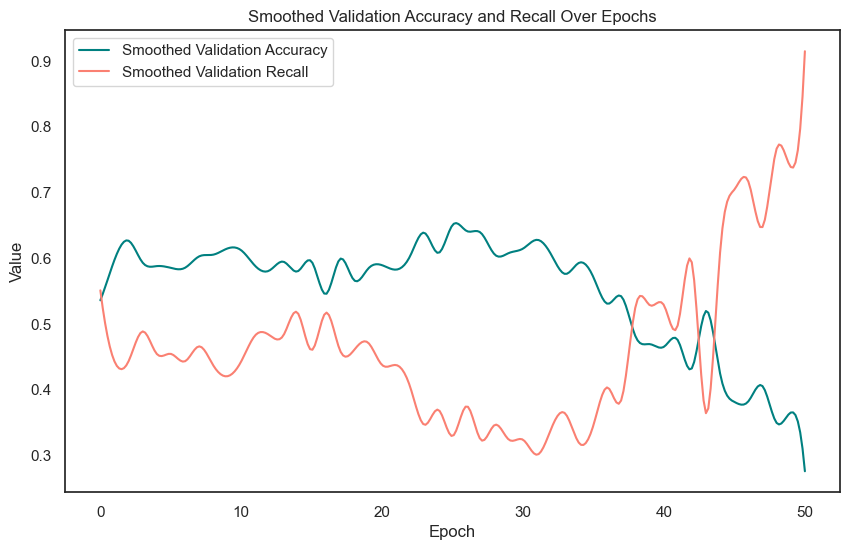

In [51]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Get the data of accuracy and recall from history.history
val_accuracy = model.history.history['val_accuracy']
val_recall = model.history.history['val_recall']

# Create a plot
plt.figure(figsize=(10, 6))

# Smooth the data using cubic spline interpolation
x_new = np.linspace(0, len(val_accuracy) - 1, 300)  # Generate more points for a smoother curve
spl_accuracy = make_interp_spline(np.arange(len(val_accuracy)), val_accuracy, k=3)
spl_recall = make_interp_spline(np.arange(len(val_recall)), val_recall, k=3)

# Plot smoothed validation accuracy
plt.plot(x_new, spl_accuracy(x_new), label='Smoothed Validation Accuracy', color='teal')

# Plot smoothed validation recall
plt.plot(x_new, spl_recall(x_new), label='Smoothed Validation Recall', color='salmon')

# Set plot labels and title
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Smoothed Validation Accuracy and Recall Over Epochs')
plt.legend()
# plt.grid()

# Show the plot
plt.show()

We can observed at trade off betweena accuracy and recall, this means that as our recall goes high, our accuracy is getting low and vice versa

### Predict from the model

In [38]:
y_preds = model.predict(X_test)
y_preds = (y_preds > 0.5).astype(int)

24/24 [==============================] - 0s 2ms/step


### Investigate other metrics

In [39]:
from sklearn.metrics import recall_score as rs, accuracy_score as asc, precision_score as ps, f1_score as f1
rs(y_test, y_preds), asc(y_test, y_preds), ps(y_test, y_preds), f1(y_test, y_preds)

(0.8031496062992126,
 0.26266666666666666,
 0.1619047619047619,
 0.2694848084544254)

### Confusion Matrix

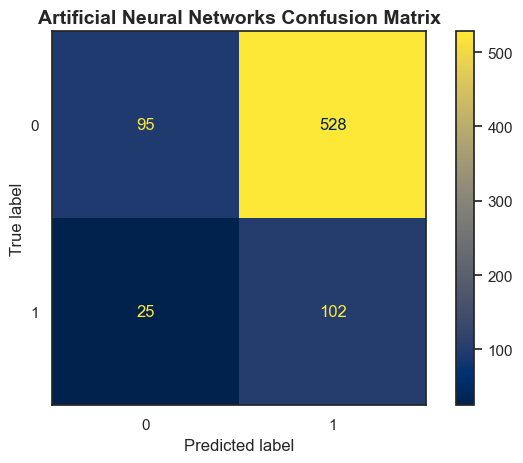

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1)
sns.set_style('white')
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis')
plt.title('Artificial Neural Networks Confusion Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()